# Spacy utilities

In [1]:
import spacy

nlp = spacy.load('en')

In [2]:
from Tweet import Tweet, Tweets
all_tweets = Tweets()

In [3]:
import os
dir_path = "./data/"
file_names = os.listdir(dir_path)
all_tweets.load([dir_path + p for p in file_names])

In [4]:
tlist = all_tweets.tweets

In [5]:
sample_tweet = tlist[500]

In [6]:
vars(sample_tweet)

{'date': None,
 'geoloc': None,
 'hashtags': None,
 'id': 966499281187176448,
 'likes': 0,
 'location': 'Uknown',
 'rt_count': 0,
 'seconds_debate': 1559,
 'text': "RT @CAPAction: .@SenBillNelson: AR-15s and AK-47s aren't for hunting. They are for killing. #EndGunViolence #CNNTownHall",
 'timestamp': 'Thu Feb 22 02:25:59 +0000 2018',
 'uid': 176251911}

In [7]:
sample_text = sample_tweet.text

In [8]:
sample_text

"RT @CAPAction: .@SenBillNelson: AR-15s and AK-47s aren't for hunting. They are for killing. #EndGunViolence #CNNTownHall"

In [9]:
doc = nlp(sample_text)

In [10]:
[e for e in enumerate(doc)]

[(0, RT),
 (1, @CAPAction),
 (2, :),
 (3, .@SenBillNelson),
 (4, :),
 (5, AR-15s),
 (6, and),
 (7, AK-47s),
 (8, are),
 (9, n't),
 (10, for),
 (11, hunting),
 (12, .),
 (13, They),
 (14, are),
 (15, for),
 (16, killing),
 (17, .),
 (18, #),
 (19, EndGunViolence),
 (20, #),
 (21, CNNTownHall)]

In [11]:
doc[5].similarity(doc[19])

0.22923288

Add attribute of type Spacy.Doc to each tweet

In [12]:
for i,t in enumerate(tlist):
    if i % 1000 == 0:
        print('processing tweet #', i, '({0:.2f}%)'.format(100*i/float(len(tlist))))
    t.doc = nlp(t.text)

processing tweet # 0 (0.00%)
processing tweet # 1000 (2.99%)
processing tweet # 2000 (5.97%)
processing tweet # 3000 (8.96%)
processing tweet # 4000 (11.95%)
processing tweet # 5000 (14.93%)
processing tweet # 6000 (17.92%)
processing tweet # 7000 (20.91%)
processing tweet # 8000 (23.89%)
processing tweet # 9000 (26.88%)
processing tweet # 10000 (29.87%)
processing tweet # 11000 (32.86%)
processing tweet # 12000 (35.84%)
processing tweet # 13000 (38.83%)
processing tweet # 14000 (41.82%)
processing tweet # 15000 (44.80%)
processing tweet # 16000 (47.79%)
processing tweet # 17000 (50.78%)
processing tweet # 18000 (53.76%)
processing tweet # 19000 (56.75%)
processing tweet # 20000 (59.74%)
processing tweet # 21000 (62.72%)
processing tweet # 22000 (65.71%)
processing tweet # 23000 (68.70%)
processing tweet # 24000 (71.68%)
processing tweet # 25000 (74.67%)
processing tweet # 26000 (77.66%)
processing tweet # 27000 (80.65%)
processing tweet # 28000 (83.63%)
processing tweet # 29000 (86.62

In [13]:
[(x,y) for x,y in enumerate(['a','b'])]

[(0, 'a'), (1, 'b')]

In [14]:
tweet_to_lemmas = lambda tweet: ' '.join([e.lemma_.strip().replace('...','') for e in tweet.doc if str(e).strip()])

In [15]:
for ix in range(len(tlist)):
    tlist[ix].lemma_text = tweet_to_lemmas(tlist[ix])

In [682]:
tlist[100].text

'RT @paolamendoza: As a mother I am crying non-stop at #CNNTownHall.\n\nAs an American I am inspired by the courage and strength of the commun…'

In [683]:
tlist[100].lemma_text

'rt @paolamendoza : as a mother -PRON- be cry non - stop at # cnntownhall . as an american -PRON- be inspire by the courage and strength of the commun …'

# Tweets w/ keyword

In [26]:
# todo: entity extraction instead of heuristic for keyword

In [61]:
rubio_tweets = [t for t in tlist if 'rubio' in t.text.lower()]

In [62]:
cameron_tweets = [t for t in tlist if 'cameron' in t.text.lower()]

In [63]:
emma_tweets = [t for t in tlist if 'emma' in t.text.lower()]

In [64]:
dana_tweets = [t for t in tlist if 'dana' in t.text.lower()]

In [33]:
len(cameron_tweets)

1031

In [37]:
[(i,t.text) for i,t in  enumerate(cameron_tweets)]

[(0,
  'RT @chick_in_kiev: @cameron_kasky : NRA money?\n@marcorubio: I will take the money of anyone who supports my agenda. #CNNTownHall'),
 (1,
  'RT @katyacr86: This kid!!!! Cameron Kasky “Senator Rubio can you tell me that you will not accept a single donation from the #NRA “ #MarcoR…'),
 (2,
  'RT @Goss30Goss: .@marcorubio just got owned on CNN by Cameron, an articulate young man. Marco will continue to take money from the NRA. He…'),
 (3,
  'RT @RedTRaccoon: Cameron Kasky just scorched Marco Rubio.\n\n#CNNTownHall #StudentsStandUp https://t.co/9psJdPgoeC'),
 (4,
  'RT @chick_in_kiev: .@cameron_kasky : "No more NRA money?" \n@marcorubio: People buy into my agenda. ... that is not our goal here.\n@cameron_…'),
 (5,
  'RT @katyacr86: This kid!!!! Cameron Kasky “Senator Rubio can you tell me that you will not accept a single donation from the #NRA “ #MarcoR…'),
 (6,
  'RT @RedTRaccoon: Cameron Kasky just scorched Marco Rubio.\n\n#CNNTownHall #StudentsStandUp https://t.co/9psJdPgoeC')

In [89]:
cameron_tweets[427]

======= Tweet ID: 966522933505077248 =======
Seconds Debate: 7199
Hashtags: None
Location: Uknown
Likes: 0
RT count: 0
Text: @cameron_kasky Heroes don't seek the occasion to rise, they rise to the occasion. #NeverAgain #CNNTownHall

In [91]:
cameron_tweets[427].timestamp

'Thu Feb 22 03:59:59 +0000 2018'

In [95]:
d = (7199/(60))//60

1.0

In [690]:
len(dana_tweets)

2099

In [691]:
emma_tweets

[======= Tweet ID: 966503588175499266 =======
 Seconds Debate: 2586
 Hashtags: None
 Location: Uknown
 Likes: 0
 RT count: 0
 Text: RT @UniteWomenNJ: @girlsreallyrule #EmmaGonzalez said Parkland students are not fooled by a brewed-up "listening session" meant to divert f…,
 ======= Tweet ID: 966499101322878977 =======
 Seconds Debate: 1517
 Hashtags: None
 Location: California
 Likes: 0
 RT count: 0
 Text: Where’s @Emma4Change ???#CNNTownHall,
 ======= Tweet ID: 966523422724558853 =======
 Seconds Debate: 7315
 Hashtags: None
 Location: Texas
 Likes: 0
 RT count: 0
 Text: RT @bcarrz: This teenager, @Emma4Change Emma Gonzalez, has more Common Sense, Empathy, Intelligence than this @NRA #BloodMoney Scum @DLoesc…,
 ======= Tweet ID: 966523377484640256 =======
 Seconds Debate: 7304
 Hashtags: None
 Location: Uknown
 Likes: 0
 RT count: 0
 Text: RT @B52Malmet: Dana Loesch is calling the crazy card. Emma Gonzalez is a #heroine. #CNNTownHall #ProtectOurKids https://t.co/BaipeJokjA,
 ======= T

In [692]:
dana_tweets

[======= Tweet ID: 966503753703677952 =======
 Seconds Debate: 2626
 Hashtags: None
 Location: Texas
 Likes: 0
 RT count: 0
 Text: RT @shannonrwatts: Ted Nugent is a longtime @NRA Board member. Reminder that CNN invited and is including NRA lobbyist Dana Loesch - a frie…,
 ======= Tweet ID: 966503745658982401 =======
 Seconds Debate: 2624
 Hashtags: None
 Location: Ohio
 Likes: 0
 RT count: 0
 Text: RT @shannonrwatts: Ted Nugent is a longtime @NRA Board member. Reminder that CNN invited and is including NRA lobbyist Dana Loesch - a frie…,
 ======= Tweet ID: 966503700385603584 =======
 Seconds Debate: 2613
 Hashtags: None
 Location: Uknown
 Likes: 0
 RT count: 0
 Text: RT @JSCram3254: I'm not seeing Dana Loesch there.  Could the @NRA only afford to pay for @marcorubio to be there? #CNNTownHall,
 ======= Tweet ID: 966503591082102784 =======
 Seconds Debate: 2587
 Hashtags: None
 Location: Illinois
 Likes: 0
 RT count: 0
 Text: RT @shannonrwatts: Ted Nugent is a longtime @NRA Board member

# basic sentiment analysis

In [24]:
# preprocess data
import pandas as pd
import numpy as np
from collections import Counter

data = pd.read_csv("./Sentiment.csv",encoding='latin1')
data.columns = [col.replace(":", "_") for col in data.columns]
data.insert(0, "id", list(range(1, len(data)+1)))

conversion = {
    "object": "TEXT",
    "float64": "NUMERIC",
    "int64": "INTEGER"
}

sql = """.separator ","
CREATE TABLE Sentiment (
%s);
.import "working/noHeader/Sentiment.csv" Sentiment
""" % ",\n".join(["    %s %s%s" % (key,
                                   conversion[str(data.dtypes[key])],
                                   " PRIMARY KEY" if key=="id" else "")
                  for key in data.dtypes.keys()])
data = data[['text','sentiment']]
data['sentiment'] = [-1 if v =='Negative' else
                     0 if v == 'Neutral' else 
                     1 for v in data['sentiment'].values]
Counter(data['sentiment'])

Counter({-1: 8493, 0: 3142, 1: 2236})

In [18]:
data.head()

,text,sentiment
0,RT @NancyLeeGrahn: How did everyone feel about...,0
1,RT @ScottWalker: Didn't catch the full #GOPdeb...,1
2,RT @TJMShow: No mention of Tamir Rice and the ...,0
3,RT @RobGeorge: That Carly Fiorina is trending ...,1
4,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,1


In [25]:
sample_tweet = rubio_tweets[101]

NameError: name 'rubio_tweets' is not defined

In [20]:
[(e.lemma_,e) for e in sample_tweet.doc]

[('rt', RT),
 ('@capaction', @CAPAction),
 (':', :),
 ('.@senbillnelson', .@SenBillNelson),
 (':', :),
 ('ar-15s', AR-15s),
 ('and', and),
 ('ak-47s', AK-47s),
 ('be', are),
 ('not', n't),
 ('for', for),
 ('hunt', hunting),
 ('.', .),
 ('-PRON-', They),
 ('be', are),
 ('for', for),
 ('kill', killing),
 ('.', .),
 ('#', #),
 ('endgunviolence', EndGunViolence),
 ('#', #),
 ('cnntownhall', CNNTownHall)]

In [21]:
sample_tweet.doc[0]

RT

In [39]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, ElasticNet
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
import pandas as pd

In [40]:
np.logspace(-1,5, 20)

array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05])

In [41]:
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['sentiment'])

In [42]:
X_train.shape

(10403,)

In [43]:
pipe = Pipeline([('vect', TfidfVectorizer(ngram_range=(1,2),
                                         stop_words='english')),
                 ('svd', TruncatedSVD(n_components=200)),
                 ('clf', LogisticRegression())])

In [44]:
param_grid = {
    'vect__max_df': (0.5, 0.75, 1.0),
    'vect__ngram_range': ((1, 1),),#, (1, 2)),  # unigrams or bigrams
    'vect__norm':['l2'],#('l1', 'l2'),
    'svd__n_components': [500],#[100, 500, 1000, 10000],
    'clf__l1_ratio': [.5],#[.5, .7, .9, .95, .99, 1],
    'clf__fit_intercept': [True, False],
    'clf__alpha': [0,1,10,100]#np.logspace(-1,2, 4)
}

In [45]:
grid = GridSearchCV(pipe, param_grid, n_jobs=-1)

In [46]:
pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,
  ...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [47]:
pipe.score(X_test,y_test)

0.6634948096885813

In [48]:
all_words = pipe.steps[0][1].get_feature_names()

In [49]:
coefs = pipe.steps[2][1].coef_

In [50]:
def top_n_words(coefs, words, n=20):
    apply_absoulute_val = lambda s: np.vectorize(abs)(s)[0]
    magnitude = apply_absoulute_val(coefs)
    zipped = zip(words,magnitude)
    words_by_mag = sorted(zipped, key=lambda x: x[1], reverse=True)
    return words_by_mag[:n]

In [51]:
def plot_most_informative_feats(top_n_feats, title=''):
    import seaborn as sns
    import matplotlib.pyplot as plt
    
    current_palette = sns.color_palette("Blues_d",
                                        n_colors=len(top_n_feats))

    x,y = zip(*top_n_feats)
    g = sns.barplot(x=x,y=y, palette=current_palette)
    g.set_xticklabels(x, rotation=90)
    g.set(xlabel='Top {0} Most Informative Features'.format(len(x)),
          ylabel='Coefficient Magnitude')
    g.set_title(title)
    plt.show()

In [52]:
top_n = top_n_words(coefs, all_words, n=20)
plot_most_informative_feats(top_n)

<Figure size 640x480 with 1 Axes>

In [53]:
Counter(pipe.predict(X_test))

Counter({-1: 2863, 0: 365, 1: 240})

# Example Plot

In [126]:
important_people ={
    'rubio' : ['rubio'],
    'emma': ['emma'],
    'dana': ['dana'],
    'tapper': ['tapper'],
    'cameron': ['cameron'],
    'trump': ['trump'],
    'nelson': ['nelson'],
    'israel': ['scott israel', 'israel', 'sheriff'], # can't use scott, confuses them
    'deutch': ['repteddeutch', 'deutch'],
    'scott': ['rick scott', 'governor', 'flgovscott'] # can't use scott, confuses them
    
}

In [127]:
texts = [t.lemma_text for t in tlist]
sent_preds = pipe.predict(texts)

In [128]:
for ix,t in enumerate(tlist):
    t.sentiment = sent_preds[ix]
    t.people = set()
    # can do something more sophisticated w/ time
    for person,syn_lst in important_people.items():
        for syn in syn_lst:
            if syn in t.text.lower():
                t.people.add(person)

In [129]:
def get_best_and_worst_tweets(tweet_series, n=1):
    n_tweet_str = ['Number of Tweets: {0}'.format(len(tweet_series))]
    best_tweets = [text for text in tweet_series[:n]]
    worst_tweets = [text for text in tweet_series[-n:]]
    to_join = n_tweet_str + ['Most Positive:'] + best_tweets + ['', 'Most Negative:'] + worst_tweets + ['']
    to_return = 'NEWLINE'.join(to_join)
    return to_return

In [130]:
def plot_person_sents(name, tlist=tlist, return_df=True,n_bins=60, return_count=False):
    import seaborn as sns
    sublist = [(t.sentiment,t.seconds_debate, t.text) for t 
                                              in tlist 
                                              if name in t.people
                                              and t.seconds_debate < 60*60*2]
    sublist = sorted(sublist, key=lambda x: (x[1],x[0]))
    sublist = [(sent, sec // n_bins,text) for sent, sec, text in sublist]
    
    time_col = 'time ({0} bins)'.format(n_bins)
    df = pd.DataFrame(sublist, columns=['sent', time_col, 'text'])
    to_prepent = ['Most Positive']
    apply_fxns = {'sent': 'count' if return_count else np.mean,
                  'text': get_best_and_worst_tweets}
    df = df.groupby(time_col, as_index=False).agg(apply_fxns)
    
    # plot
    sns.regplot(df[time_col],df['sent'])
    
    if return_df:
        return df
    else:
        return zip(*sublist)

In [131]:
def plot_person_mentions(name, tlist=tlist, return_df=True,n_bins=60):
    import seaborn as sns
    sublist = [(t.sentiment,t.seconds_debate) for t 
                                              in tlist 
                                              if name in t.people]
                                              #and t.seconds_debate < 60*60*2]
    sublist = sorted(sublist, key=lambda x: x[1])
    sublist = [(sent, sec // n_bins) for sent, sec in sublist]
    
    time_col = 'time ({0} bins)'.format(n_bins)
    df = pd.DataFrame(sublist, columns=['sent', time_col])
    df = df.groupby(time_col, as_index=False).agg('count')
    print(df.head())
    
    # plot
    sns.regplot(df[time_col],df['sent'])
    
    if return_df:
        return sublist
        return df
    else:
        return zip(*sublist)

In [132]:
def df_to_data_string(df, name):
    from statsmodels.api import OLS
    lm = OLS(df.sent,df.iloc[:,1]).fit()
    print(lm.params)
    slope = lm.params[0]
    intercept = 0

    data_list = []
    for ix in range(len(df)):
        secs,sent,text = df.iloc[ix,:].values
        #secs += ix
        data_list.append({'sent':sent,
                          'timestamp': secs,
                          'sample_tweets': text.replace(' ','SPACE').replace('\n','NEWLINE'),
                          'slope': slope,
                          'intercept': intercept})
    return_str = ''.join(str(data_list).split())
    
    fpath = './d3/data_strs/{0}.txt'.format(name)
    with open(fpath, 'w') as f:
        f.write(return_str)
    return return_str


sent    1.0
dtype: float64
sent    1.0
dtype: float64
sent    1.0
dtype: float64
sent    1.0
dtype: float64
sent    1.0
dtype: float64
sent    1.0
dtype: float64
sent    1.0
dtype: float64
sent    1.0
dtype: float64
sent    1.0
dtype: float64
sent    1.0
dtype: float64


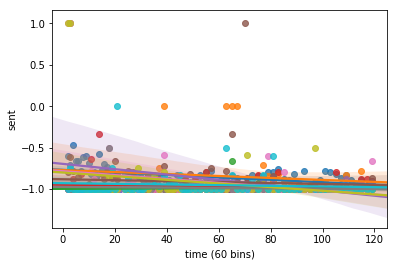

In [134]:
for person in important_people.keys():
    df = plot_person_sents(person, return_count=True)
    # saves array to file as string
    df_str = df_to_data_string(df, '{0}_counts'.format(person)) 